# Computing Project - Initial

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Constants

In [ ]:
G = 6.67430e-11 # m^3 kg^-1 s^-2
m_e = 5.972e24 # kg
m_m = 7.348e22 # kg
d = 384400000 # m
time_step = 10 #s

In [ ]:
T = 2*np.pi*np.sqrt(d**3/(G*(m_e + m_m)))
max_time = 2*86400
time = np.arange(0, max_time, time_step) #s
n_steps = len(time)

### Initial Conditions

In [ ]:
r0 = np.array([ 4.672203365e6, 6.571000e6])  # m
v0 = np.array([ 10988.378, 12.452740 ]) # m/s

## Functions

In [ ]:
def pos_earth_moon(t,circular=True):
    """
    This function returns the position of the Earth-Moon about it's barycenter at time t

    Inputs: 
        time_step - interval of time in seconds which the position is to be calculated

    Outputs
        pos_earth - Array size (2,int(max_time/timestep))
        pos_moon - Array size (2,int(max_time/timestep))
    """
    if circular:
        # Angular velocity
        omega = 2*np.pi/T # rad/s

        # Earth position (assuming circular orbit around barycenter)
        r_e = d*m_m/(m_e + m_m) # m
        x_e = r_e * np.cos(omega*t) # x position of Earth, m
        y_e = r_e * np.sin(omega*t) # y position of Earth, m

        # Moon position (assuming circular orbit around barycenter)
        r_m = d*m_e/(m_e + m_m) # m
        x_m = r_m * np.cos(omega*t + np.pi) # x position of Moon, m
        y_m = r_m * np.sin(omega*t + np.pi) # y position of Moon, m

        pos_earth = np.array([x_e, y_e])
        pos_moon = np.array([x_m, y_m])
        return pos_earth, pos_moon
    else:
        raise(NotImplementedError("Elliptical orbits not yet implemented"))

### Solving ODE

In [ ]:
def acceleration(x, y, t):
    '''
    This function calculates the acceleration on a rocket at position (x,y) at time t
    '''
    pos_earth, pos_moon = pos_earth_moon(t)

    # Distance vectors

    r_earth = np.array([x - pos_earth[0], y - pos_earth[1]])
    r_moon = np.array([x - pos_moon[0], y - pos_moon[1]])

    # Magnitudes
    r_earth_mag = np.linalg.norm(r_earth)
    r_moon_mag = np.linalg.norm(r_moon)

    # Gravitational acceleration
    a_earth = -G * m_e * r_earth / r_earth_mag**3
    a_moon = -G * m_m * r_moon / r_moon_mag**3

    return a_earth + a_moon

In [ ]:
def evolve(r_rocket,v_rocket, n_steps,type = 'RK4'):
    # Preallocate arrays
    x_r = np.zeros(len(time))
    y_r = np.zeros(len(time))
    vx_r = np.zeros(len(time))
    vy_r = np.zeros(len(time))

    # Set Initial conditions
    x_r[0],y_r[0]  = r_rocket[0], r_rocket[1]
    vx_r[0],vy_r[0] = v_rocket[0], v_rocket[1]
    

    if type == 'Taylor':
        for i in range(n_steps-1):
            a_rocket = acceleration(x_r[i], y_r[i], time[i])

            x_r[i+1] = x_r[i] + time_step*vx_r[i] + 0.5*time_step**2*a_rocket[0]
            vx_r[i+1] = vx_r[i] + time_step*a_rocket[0]

            y_r[i+1] = y_r[i] + time_step*vy_r[i] + 0.5*time_step**2*a_rocket[1]
            vy_r[i+1] = vy_r[i] + time_step*a_rocket[1]


    elif type == 'RK4':
        for i in range(n_steps-1):
            # z1
            r = np.array([x_r[i], y_r[i]])
            v = np.array([vx_r[i], vy_r[i]])
            z1 = r + 0.5*time_step*v
            z1_dot = v + 0.5*time_step*acceleration(x_r[i], y_r[i], time[i])[0]

            #z2
            z2 = r + 0.5*time_step*z1_dot
            z2_dot = v + 0.5*time_step*acceleration(z1, y_r[i], time[i] + 0.5*time_step)[0]

            #z3
            z3 = r + time_step*z2_dot
            z3_dot = v + time_step*acceleration(z2, y_r[i], time[i] + time_step)[0]
            
            
    pos_rocket = np.array([x_r, y_r])
    v_rocket = np.array([vx_r, vy_r])
    return pos_rocket, v_rocket

In [ ]:
pos_rocket, v_rocket = evolve(r0,v0, n_steps)
pos_earth, pos_moon = pos_earth_moon(time)

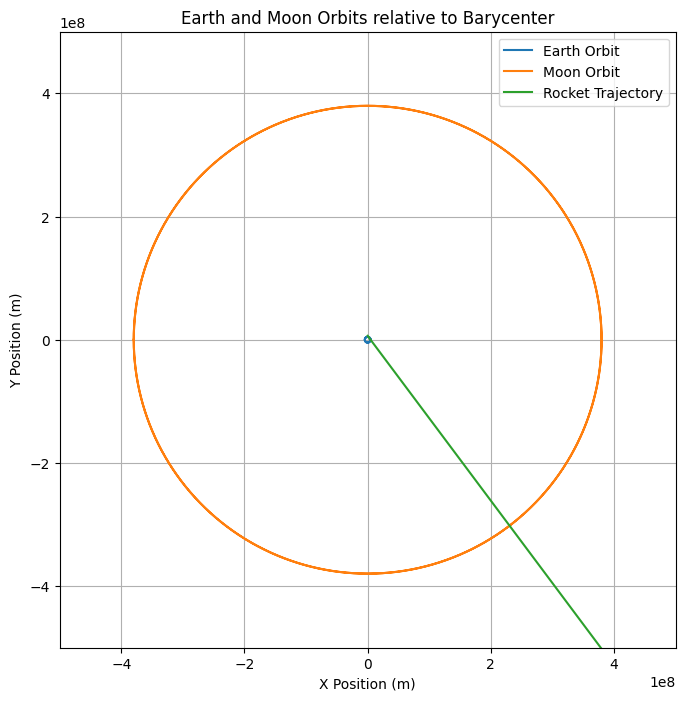

In [14]:
# Create figure and axes explicitly
fig = plt.figure(figsize=(8, 8))  # adjustable figure size
ax = plt.axes()  # creates a single Axes object

# Plot on the specific Axes
ax.plot(pos_earth[0], pos_earth[1], label='Earth Orbit')
ax.plot(pos_moon[0], pos_moon[1], label='Moon Orbit')
ax.plot(pos_rocket[0], pos_rocket[1], label='Rocket Trajectory')

# Add labels, legend, grid
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_title('Earth and Moon Orbits relative to Barycenter')
ax.legend()
ax.grid(True)
ax.set_xlim(-5e8, 5e8)
ax.set_ylim(-5e8, 5e8)
# Equal aspect ratio for orbits
ax.set_aspect('equal', 'box')

plt.show()